# Prosail model at canopy level

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import prosail
import matplotlib.cm as cm

## Simulating canopy sprctra with varying LAI

Leaf area index is the total one sided area of leaf surfaces per unit ground area.

In [28]:
LAI = np.arange(0, 6.5, 0.5)

Error encountered for LAI=0.0: Inconsistent output for LAI=0.0. Expected: 2101, Got: <class 'float'>


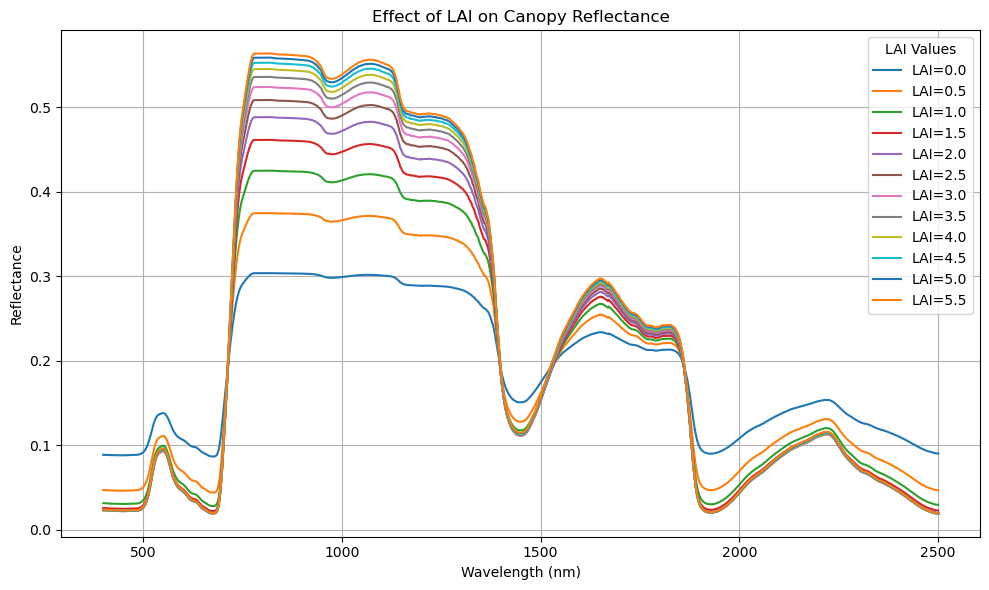

In [29]:
spectra = []

wave, refl ,trans = prosail.run_prospect(1.5, 40, 10, 0, 0.01, 0.009)

expectedLength = len(wave)

for lai in LAI:
    try:
        canopy_refl = prosail.run_sail(
            lai=lai,
            lidfa=-0.5,
            lidfb=0,
            refl=refl,
            trans=trans,
            rsoil0=0.2,  # Soil reflectance
            hspot=0.01,
            tts=30,      # Solar zenith angle
            tto=10,      # View zenith angle
            psi=0     
        )

        #hasattr checks if canopy_refl has a length attribut (len) like a numpy aray, list etc..
        #it stands for "has attribute"
        if not hasattr(canopy_refl, "__len__") or len(canopy_refl) != expectedLength:
            raise ValueError(f"Inconsistent output for LAI={lai}. Expected: {expectedLength}, Got: {len(canopy_refl) if hasattr(canopy_refl, '__len__') else type(canopy_refl)}")
        
        spectra.append(canopy_refl)
    except Exception as e:
        print(f"Error encountered for LAI={lai}: {e}")
         # Skip to the next LAI value
        continue 


plt.figure(figsize=(10, 6))
for i, lai in enumerate(LAI):
    if i < len(spectra):  # Ensure the index is within range
        plt.plot(wave, spectra[i], label=f"LAI={lai:.1f}")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Effect of LAI on Canopy Reflectance")
plt.legend(title="LAI Values", fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Simulating canopy sprctra with varying Leaf angle

- **LIDFA**: Average leaf angle (varies between -1 and 1).
- **LIDFB**: Distribution of leaf angles (fixed at 0).

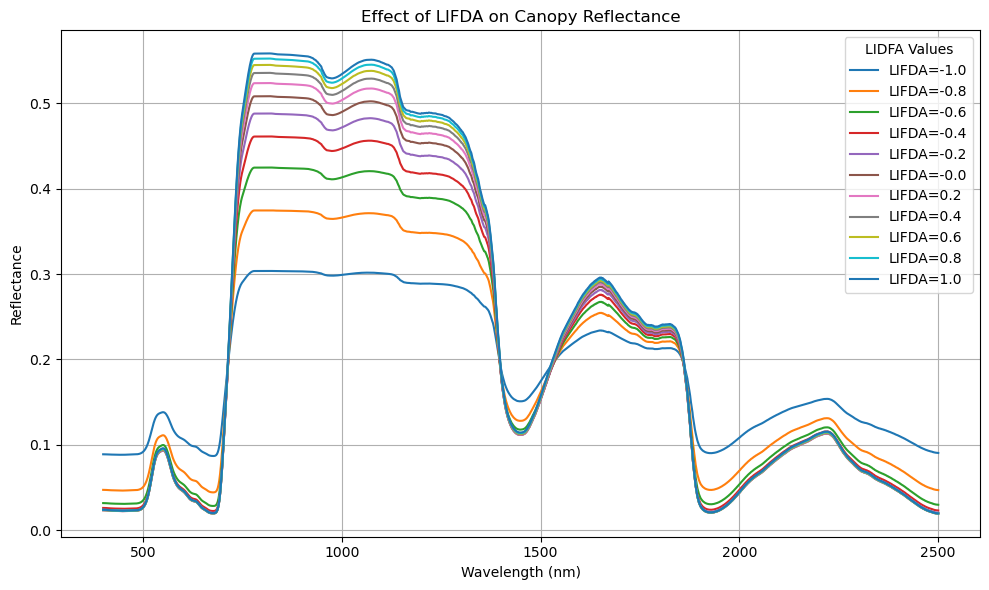

In [30]:
LAI = 3

#varying from -1 to 1
LIDFA_values = np.arange(-1,1.2, 0.2)
LIFDB = 0

wave, refl ,trans = prosail.run_prospect(1.5, 40, 10, 0, 0.01, 0.009)

expectedLength = len(wave)

for lidfa in LIDFA_values:
    try:
        canopy_refl = prosail.run_sail(
            lai=LAI,
            lidfa= lidfa,
            lidfb=LIFDB,
            refl=refl,
            trans=trans,
            rsoil0=0.2,  # Soil reflectance
            hspot=0.01,
            tts=30,      # Solar zenith angle
            tto=10,      # View zenith angle
            psi=0     
        )

        if not hasattr(canopy_refl, "__len__") or len(canopy_refl) != expectedLength:
            raise ValueError(f"Inconsistent output for LAI={lai}. Expected: {expectedLength}, Got: {len(canopy_refl) if hasattr(canopy_refl, '__len__') else type(canopy_refl)}")
        
        spectra.append(canopy_refl)
    except Exception as e:
        print(f"Error encountered for LAI={lai}: {e}")
         # Skip to the next LAI value
        continue 


plt.figure(figsize=(10, 6))
for i, lidfa in enumerate(LIDFA_values):
    if i < len(spectra):  # Ensure the index is within range
        plt.plot(wave, spectra[i], label=f"LIFDA={lidfa:.1f}")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Effect of LIFDA on Canopy Reflectance")
plt.legend(title="LIDFA Values", fontsize=10, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()